####For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

####Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

####1a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [1]:
import pandas as pd
import numpy as np
from numpy import *

In [2]:
#Read the dataset and make sure to use na_values parameters to track down all the na and missing values.
ccData=pd.read_csv('./communities/communities.csv', na_values=["?"])

In [3]:
ccData.shape

(1994, 100)

In [4]:
ccData.head(5)

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [5]:
#Check any missing or na values
missing_tab=ccData.isnull().sum(0)
missing_tab[missing_tab>0]

OtherPerCap    1
dtype: int64

Based on the above, there is one missing value from on the attribute 'OtherPerCap'

In [6]:
#Fill in the missing value in the 'OtherPerCap' attribute by its MEAN value 
ccData.OtherPerCap.fillna(ccData.OtherPerCap.mean(axis=0), axis=0,inplace=True)

In [8]:
#Double check if there is any more missing values
missing_tab=ccData.isnull().sum(0)
sum(missing_tab[missing_tab>0])

0

In [9]:
#Now we check on the statistics of every attribute
ccData.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.0000,34.000,42.0000,56.0
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0


In [10]:
#Split the original table into predictor set and target variable
x=ccData.ix[:,0:-1] #Predictor set
y=ccData.ViolentCrimesPerPop # Target/Response variable

In [11]:
#Drop the identifier attribute 'state'
x.drop('state', axis=1,inplace=True)

In [12]:
#Drop the identifier attribute 'communityname'
x.drop('communityname', axis=1,inplace=True)

In [13]:
#Check on predictor variables statistics
x.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [14]:
#Check on the target variable statistic
y.describe().T

count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

####1b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [15]:
x1=np.array(x)
y1=np.array(y)
# Should to add a column of ONEs for x0 in order to do multiple regression
x1=np.array([np.concatenate((v,[1])) for v in x1])

In [16]:
#MLA Functions from textbook Machine Learning in Action, Chapter 8:
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [17]:
w_standRegres=standRegres(x1,y1)
w_standRegres

matrix([[  1.31108068e-01],
        [ -3.14114977e-02],
        [  2.09909670e-01],
        [ -4.05351612e-02],
        [ -1.38892919e-02],
        [  5.89726825e-02],
        [  1.23399025e-01],
        [ -2.22621600e-01],
        [ -1.47500199e-01],
        [  5.01635477e-02],
        [ -2.42413829e-01],
        [  4.64024392e-02],
        [ -1.96945615e-01],
        [ -2.06117500e-01],
        [  4.65935490e-02],
        [ -1.77212915e-01],
        [  6.30148504e-02],
        [  1.14942190e-02],
        [ -9.08951848e-02],
        [  2.74640044e-01],
        [  1.01752476e-01],
        [ -3.31517562e-01],
        [ -2.91799268e-02],
        [ -3.54483393e-02],
        [  2.26173855e-02],
        [  4.30950137e-02],
        [  3.44408548e-02],
        [  1.28412458e-01],
        [ -1.91293360e-01],
        [ -1.00769002e-01],
        [  6.46856092e-02],
        [  1.06062117e-01],
        [  2.44126016e-06],
        [  2.34984611e-01],
        [ -3.75705330e-02],
        [ -7.7495766

In [18]:
x1=np.mat(x1)
predict_y=np.dot(x1,w_standRegres) #Predict the dependent variable based on the above calculated weights 
predict_y.shape

(1994, 1)

In [19]:
predict_y=np.array(predict_y).T

In [20]:
predict_y2=predict_y[0]
predict_y2.shape

(1994,)

In [21]:
# Now we can constuct a vector of errors
err = abs(predict_y2-y1.T)
err=np.mat(err)

In [22]:
rmse_train=np.sqrt(np.dot(err,err.T) / len(predict_y2))

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold

# Create linear regression object
linreg = LinearRegression()
n = 10
kf = KFold(len(x1), n_folds=n)
xval_err = 0
for train,test in kf:
    linreg.fit(x1[train],y1[train])
    p = linreg.predict(x1[test])
    e = p-y1[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x1[test]))
       
rmse_10cv = xval_err/n

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
print('The Training RMSE is %0.5f'%(rmse_train))
print('The 10fold RMSE is %0.5f'%(rmse_10cv))

The Training RMSE is 0.12889
The 10fold RMSE is 0.13586


Based on the above, the RMSE between Training and 10-fold are very close. 

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#Actual Target Value from original Data
y1.shape

(1994,)

In [27]:
#Predicted value from the
predict_y2.shape

(1994,)

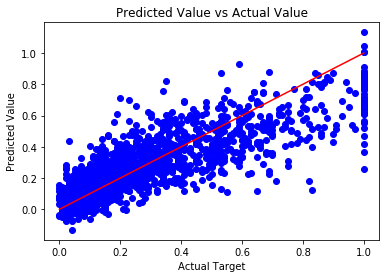

In [28]:
#Plot the Predicted Value vs Actual Value
plt.plot(y1,predict_y2,'ro', color='blue')
plt.plot([0,1],[0,1],'red')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value')
plt.show()

In [29]:
#Correlation between predicted value and Actual Value
corrcoef(predict_y2, y1)

array([[ 1.        ,  0.83294957],
       [ 0.83294957,  1.        ]])

####1c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [30]:
from sklearn.cross_validation import train_test_split
x1=np.array(x1)
x_train, x_test, y_train, y_test = train_test_split(x1, y1.T, test_size=0.2, random_state=55)

In [31]:
x_train.shape

(1595, 98)

In [32]:
y_train.shape

(1595,)

In [33]:
x_test.shape

(399, 98)

In [34]:
y_test.shape

(399,)

In [35]:
type(y_train)

numpy.ndarray

In [36]:
from sklearn import feature_selection
from sklearn import cross_validation

# Create linear regression object
linreg = LinearRegression()
results=[]
n_fold=5 #Set number of fold =5
percentiles = range(1, 100, 5) #Pre-set the the precentile
for i in range(1,100,n_fold):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression ,percentile=i)
    x_train_fs = fs.fit_transform(x_train,y_train)
    scores = abs(cross_validation.cross_val_score(linreg,x_train_fs,y_train,cv=5,scoring='mean_absolute_error'))
    print(i,scores.mean())
    results = np.append(results, scores.mean())

    


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users

1 0.113943060315
6 0.101191612456
11 0.101175759705
16 0.101243083971
21 0.0995874757738
26 0.0982839780838
31 0.0976837268074
36 0.0971086224375
41 0.0966454393648
46 0.0974334227416
51 0.097762665564


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

56 0.0979647775442
61 0.0987830572765
66 0.099202338531
71 0.0995516982625
76 0.0984921834617
81 0.098671167702
86 0.0985200638453
91 0.0990166587181
96 0.098333824917


/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-package

In [37]:
percentiles = range(1, 100, 5)
optimal_percentile = np.where(results == results.min())[0]
print('Optimal percentile of features:',percentiles[optimal_percentile])
optimal_num_features = (int(percentiles[optimal_percentile])/100) * len(x.columns)
print('Optimal number of features: %2d' %(optimal_num_features))

Optimal percentile of features: 41
Optimal number of features: 39


/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/KevQuant/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  after removing the cwd from sys.path.


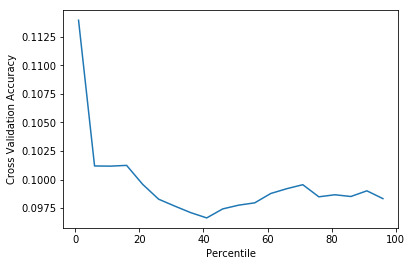

In [38]:
plt.plot(percentiles,results)
plt.xlabel('Percentile')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [39]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/KevQuant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [40]:
#The following shows the optimal features and their scores
for i in range(len(x.columns.values)):
    if fs.get_support()[i]:
        print (x.columns.values[i], '\t', fs.scores_[i])

population 	 208.41261328
racepctblack 	 1047.17072994
racePctWhite 	 1378.54255124
numbUrban 	 203.280067113
medIncome 	 340.039081698
pctWInvInc 	 759.277958878
pctWPubAsst 	 775.367280937
medFamInc 	 369.968950665
perCapInc 	 214.476272283
NumUnderPov 	 351.350284421
PctPopUnderPov 	 601.321078238
PctLess9thGrade 	 350.660916764
PctNotHSGrad 	 501.428584848
PctBSorMore 	 170.828982428
PctUnemployed 	 535.048270241
PctEmploy 	 202.929512551
MalePctDivorce 	 600.416653191
FemalePctDiv 	 694.198504598
TotalPctDiv 	 686.288270843
PctFam2Par 	 1577.7293989
PctKids2Par 	 1878.58699592
PctYoungKids2Par 	 1255.59323019
PctTeen2Par 	 1236.42780275
NumIlleg 	 426.473129708
PctIlleg 	 1873.74692879
PctNotSpeakEnglWell 	 174.364894226
PctLargHouseFam 	 285.663993303
PctPersOwnOccup 	 609.905473623
PctPersDenseHous 	 426.422975995
PctHousLess3BR 	 462.104835912
MedNumBR 	 229.82615215
HousVacant 	 315.227840688
PctHousOccup 	 178.762852021
PctHousOwnOcc 	 446.41763617
PctVacantBoarded 	 456.4409

####1d) Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
%matplotlib inline

#Assign Ridge Regression and Lasso Regression
ridreg = Ridge()
lasreg = Lasso()

In [42]:
from sklearn.cross_validation import train_test_split
#Split the train (80%) and test(20%) dataset
x_train, x_test, y_train, y_test = train_test_split(x1, y1.T, test_size=0.2, random_state=55)

In [43]:
#Check Ridge Regression parameters
print (ridreg.get_params())
print (lasreg.get_params())

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [44]:
def calc_params(x, y, clf, param_values, param_name, K):
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    x=np.array(x)
    y=np.array(y)


    for i , param_value in enumerate(param_values):
        clf.set_params(**{param_name:param_value})
        cv = KFold(len(x), K, shuffle=True, random_state=0)

        mae_err_train=np.zeros(K)
        mae_err_test=np.zeros(K)


        for j , (train, test) in enumerate(cv):
            clf.fit([x[k] for k in train],y[train])
            train_predict=clf.predict(x[train])
            test_predict=clf.predict(x[test])
            #Find the Mean Absolute Error for the Regression on Train and Test result
            mae_err_train[j]=mean_absolute_error(y[train],train_predict)
            mae_err_test[j]=mean_absolute_error(y[test],test_predict)
        
        #Take the average of the Mean Absolute Error for every parameter value
        train_scores[i]=np.mean(mae_err_train)
        test_scores[i]=np.mean(mae_err_test)
    
    #Find the Best score for test result
    min_test_scores = test_scores[np.where(test_scores==test_scores.min())][0]
    #min_test_scores = min(test_scores)
    #Find the best parameter value
    best_param = param_values[np.where(test_scores==test_scores.min())][0]
    #best_param = param_values[argmin(test_scores)]
    
    
    plt.plot(param_values,train_scores, color='blue', label='Train',alpha=0.4)
    plt.plot(param_values,test_scores, color='red', label='Test',alpha=0.4)
    plt.xlabel('Alpha Values')
    plt.ylabel('K Fold Cross Validation MAE Error Accuracy')
    plt.legend(loc=7)
    plt.show()
    
    return train_scores , test_scores, min_test_scores, best_param

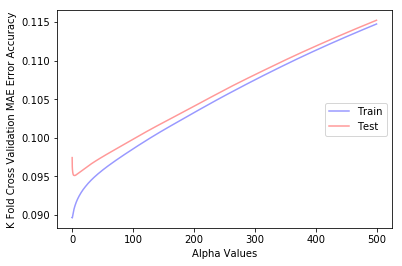

The minimum MAE Value is 0.09511
The best parameter alpha is 4.00170


In [45]:
#Create parameter : alpha value list
alpha= np.linspace(0.0001,500,2500)

#Set up the function entries
x = x_train #80% of the original dataset
y = y_train
clf = ridreg #Ridge Regression model
param_values = alpha  #Parameter: alpha values
param_name = 'alpha' #Parameter name
K = 5 #Number of KFold

#Call the calc_params function for Ridge Regression
a,b,c,d=calc_params(x, y, clf, param_values, param_name,K)
print('The minimum MAE Value is %0.5f'% (c))
print('The best parameter alpha is %0.5f'%(d))

In [47]:
#Use the Best parameter: alpha run for the 20% Test Set
ridreg.set_params(alpha=4.00170) #Use the best parameter: alpha for predicting the test set
ridreg.fit(x_train,y_train)
test_predict = ridreg.predict(x_test)
MAE=mean_absolute_error(y_test,test_predict) #Mean Absolute Error of test set
err= test_predict - y_test
rmse=np.sqrt(np.dot(err,err)/len(y_test))
print('MAE of Ridge Regression on Test Dataset is ', MAE)
print('RMSE of Ridge Regression on Test Dataset is ', rmse)

MAE of Ridge Regression on Test Dataset is  0.0960277361877
RMSE of Ridge Regression on Test Dataset is  0.131205099539


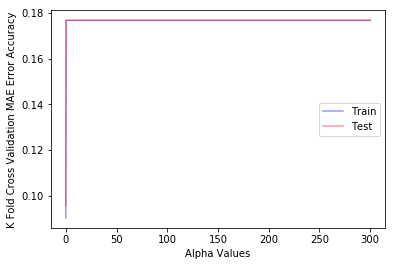

The minimum MAE Value is 0.09553
The best parameter alpha is 0.00010


In [51]:
#Create parameter : alpha value list
alpha= np.linspace(0.0001,300,1000)

#Set up the function entries
x = x_train #80% of the original dataset
y = y_train
clf = lasreg #Lasso Regression model
param_values = alpha  #Parameter: alpha values
param_name = 'alpha' #Parameter name
K = 5 #Number of KFold

#Call the calc_params function for Ridge Regression
a,b,c,d=calc_params(x, y, clf, param_values, param_name,K)
print('The minimum MAE Value is %0.5f'% (c))
print('The best parameter alpha is %0.5f'%(d))

In [52]:
#Use the Best parameter: alpha run for the 20% Test Set
lasreg.set_params(alpha=0.0001) #Use the best parameter: alpha for predicting the test set
lasreg.fit(x_train,y_train)
test_predict = lasreg.predict(x_test)
MAE=mean_absolute_error(y_test,test_predict) #Mean Absolute Error of test set
err= test_predict - y_test
rmse=np.sqrt(np.dot(err,err)/len(y_test))
print('MAE is ', MAE)
print('RMSE is ', rmse)

MAE is  0.0959257086164
RMSE is  0.130668754283


According to the above Ridge and Lasso Regression analysis. 

The Mean Absolute Error (MAE) of Ridge Regression for the training set (80% of original data) is 0.09511 with Alpha 4.0017. By observing the plot (MAE vs Alpha), there is NO obvious underfitting or overfitting occurs. Also, the graph shows that the higher value of alpha gives the higher value of errors. For the Testing set analysis, the MAE is 0.096027 with Alpha. The MAE value between Training and testing set is very close, so that it could prove that there is NO overfitting occuring in the case.

The Mean Absolute Error (MAE) of Lasso Regression for trainging set (20% of original data) is 0.09553 with Alpha 0.0001. By observing the plot (MAE vs Alpha), the MAE value are very close between train and test set of Training data. However, the change of value of alpha does NOT give any improvement on the MAE. For the Testing set analysis, The MAE is 0.09592 with Alpha 0.0001. 

In this particular case, we could see that the alpha value of Lasso which is 0.0001 is very small. The feature of Lasso model adds penalty equivalent to absolute value of the magnitude of coefficients. So that the small value alpha 0.0001 shows the Lasso model does not make a lot of adjustment / penalty to the original model. Another feeature of Lasso is that it could help to perform a feature selection. In this case, the feature selection feature does not quite function well when the small alpha 0.0001. On the contrary, the Ridge Regression with Alpha 4.0017 shows the optimal result. Also, Ridge helps to improve the over-fitting problem in this case because  the higher of Alpha tends to have lower MAE, OR might even turns into under-fitting. To sum up, Ridge Regression would be the best model for this analysis. 

####1e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x1)
x_s = scaler.transform(x1)


In [54]:
print(type(x1))
print(type(y1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [55]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y1, test_size=0.2, random_state=55)

In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.grid_search import GridSearchCV

#Preset SGDRegressor parameters
sgdreg=SGDRegressor()
sgdpara={'penalty':['l2','l1']
         ,'alpha': np.linspace(0.0001,100,500)}
        #,'l1_ratio': np.linspace(0.1,1,200)}

/Users/KevQuant/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [57]:
#Check the parameter for the SDGRegression function
sgdreg.get_params()

{'alpha': 0.0001,
 'average': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'n_iter': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [58]:
#Search out the best parameter
sgd_gs=GridSearchCV(sgdreg,sgdpara,cv=5)

In [59]:
sgd_gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2', 'l1'], 'alpha': array([  1.00000e-04,   2.00501e-01, ...,   9.97996e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [60]:
for i,(para,value) in enumerate (sgd_gs.best_params_.items()):
    print(i+1,') The optimal parameter:',para,'is',value)

1 ) The optimal parameter: alpha is 0.400901202405
2 ) The optimal parameter: penalty is l2


In [61]:
sgdreg=SGDRegressor(penalty='l2', alpha=0.4) #plug in the optimal parameters from the Grid Search
sgdreg.fit(x_train,y_train) #Use the 80% train data to create model
predict_y = sgdreg.predict(x_test) #Predict the 20% test data
err = predict_y-y_test
rmse = np.sqrt(np.dot(err,err)/len(y_test))
MAE = mean_absolute_error()
print('rmse is %0.3f'% (rmse), 'with penaly: l2 and alpha:0.0001' )



rmse is 0.134 with penaly: l2 and alpha:0.0001


In [62]:
#Function to find the best parameters
def calc_params(x, y, clf, param_values, param_name, param_name2,param_values2,K):
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    x=np.array(x)
    y=np.array(y)


    for i , param_value in enumerate(param_values):
        clf.set_params(**{param_name:param_value
                          ,param_name2:param_value2})
        cv = KFold(len(x), K, shuffle=True, random_state=0)

        mae_err_train=np.zeros(K)
        mae_err_test=np.zeros(K)


        for j , (train, test) in enumerate(cv):
            clf.fit([x[k] for k in train],y[train])
            train_predict=clf.predict(x[train])
            test_predict=clf.predict(x[test])
            #Find the Mean Absolute Error for the Regression on Train and Test result
            mae_err_train[j]=mean_absolute_error(y[train],train_predict)
            mae_err_test[j]=mean_absolute_error(y[test],test_predict)
        
        #Take the average of the Mean Absolute Error for every parameter value
        train_scores[i]=np.mean(mae_err_train)
        test_scores[i]=np.mean(mae_err_test)
    
    #Find the Best score for test result
    min_test_scores = test_scores[np.where(test_scores==test_scores.min())][0]
    #min_test_scores = min(test_scores)
    #Find the best parameter value
    best_param = param_values[np.where(test_scores==test_scores.min())][0]
    #best_param = param_values[argmin(test_scores)]
    
    
    plt.plot(param_values,train_scores, color='blue', label='Train',alpha=0.4)
    plt.plot(param_values,test_scores, color='red', label='Test',alpha=0.4)
    plt.xlabel('Alpha Values')
    plt.ylabel('K Fold Cross Validation MAE Error Accuracy')
    plt.legend(loc=7)
    plt.show()
    
    return train_scores , test_scores, min_test_scores, best_param

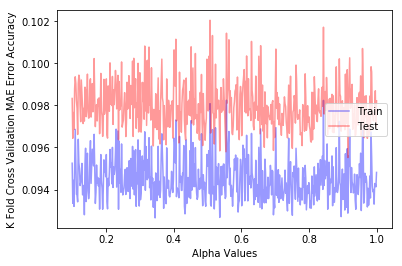

The minimum MAE Value is 0.09552
The best parameter l1_ratio is 0.91523


In [182]:
#Create parameter : alpha value list
l1_ratio= np.linspace(0.1,1,500)

#Set up the function entries
x = x_s #80% of the original dataset
y = y1
clf = sgdreg #SDG Regression model
param_values = l1_ratio  #Parameter: l1_rato values
param_name = 'l1_ratio' #Parameter name
param_values2 = 'elasticnet'  #Parameter: penalty values
param_name2 = 'penalty' #Parameter name
K = 5 #Number of KFold

#Call the calc_params function for Ridge Regression
a,b,c,d=calc_params(x, y, clf, param_values, param_name, param_name2,param_values2,K)
print('The minimum MAE Value is %0.5f'% (c))
print('The best parameter l1_ratio is %0.5f'%(d))

In [63]:
penalty_val='elasticnet'
alpha_val=0.0001
l1_ratio_val=0.91523
n_iter_val=300

sgdreg=SGDRegressor(penalty=penalty_val, alpha=alpha_val,l1_ratio=l1_ratio_val, n_iter=n_iter_val)
sgdreg.fit(x_s,y1)
predict_y = sgdreg.predict(x_test)
err=predict_y - y_test
rmse=np.sqrt(np.dot(err,err)/len(y_test))
MAE=mean_absolute_error(predict_y,y_test)
print('rmse is %0.5f with penalty=%s, alpha=%0.5f, l1_ratio=%0.5f, iteration=%d '
      %(rmse,penalty_val,alpha_val,l1_ratio_val,n_iter_val))

print('MAE is %0.5f with penalty=%s, alpha=%0.5f, l1_ratio=%0.5f, iteration=%d '
      %(MAE,penalty_val,alpha_val,l1_ratio_val,n_iter_val))

rmse is 0.12580 with penalty=elasticnet, alpha=0.00010, l1_ratio=0.91523, iteration=300 
MAE is 0.09275 with penalty=elasticnet, alpha=0.00010, l1_ratio=0.91523, iteration=300 


Based on the above experiment results, we could observe that using the Grid Search function really help to search out the best parameter for the dataset. The MAE and RMSE result on the test dataset are very close to the previous analysis (Standard Linear Regression, Ridge Regression, Lasso Regression). However, the Grid Search function definitely increase the efficiency of choosing the best parameters for the model.

####2)Automatic Document Clustering [Dataset: newsgroups5.zip]
####For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

####Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

####2a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload

In [365]:
import math
from collections import Counter
# x = the instance to be classified
# D = training data matrix

def disCosine(x,D):
    dot_pro = np.dot(D,x)
    x_norm = np.linalg.norm(x)
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    sims=dot_pro / (x_norm * D_norm)
    dists=1-sims
    return dists

####2b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [366]:
df = pd.read_csv('./newsgroups5/matrix.txt',header=None,na_values='?')
df_class = pd.read_csv('./newsgroups5/classes.txt',sep=' ')
terms = pd.read_csv('./newsgroups5/terms.txt',header=None)

In [367]:
sum(df.isnull().sum(0)>0)

0

There is NO missing values based on the above.

In [368]:
df=df.T
df_class=df_class.iloc[:,1]

In [369]:
df=np.array(df)
df_class=np.array(df_class)
terms=np.array(terms)

In [370]:
df.shape

(2500, 9328)

In [225]:
df_class.shape

(2500,)

In [226]:
terms.shape

(9328, 1)

In [227]:
N_doc_train=df.shape[0]
N_terms=terms.shape[0]
print('There are ',N_doc_train,'documents')
print('There are ',N_terms,'terms')


There are  2500 documents
There are  9328 terms


In [228]:
df[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [229]:
df_class[0:5]

array([0, 1, 1, 1, 2])

In [230]:
terms[0:5]

array([['aa'],
       ['aargh'],
       ['aaron'],
       ['aaronc'],
       ['ab']], dtype=object)

In [231]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train, y_test = train_test_split(df,df_class,test_size=0.2,random_state=55)

In [232]:
x_train.shape

(2000, 9328)

In [233]:
x_test.shape

(500, 9328)

In [234]:
y_train.shape

(2000,)

In [235]:
y_test.shape

(500,)

####2c) As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

In [236]:
#Create a New Dataframe with the same size as the train data set
N_matrix_train=np.ones(x_train.shape,dtype=float) * N_doc_train
N_matrix_train.shape

(2000, 9328)

In [237]:
#Total Number of Document contains every Vocabulary 
df_train=np.array([(x_train!=0).sum(0)])
df_train.shape

(1, 9328)

In [238]:
len(np.where(df_train<10)[1])

6441

In [239]:
index_df_train_less10=np.where(df_train<10)
index_df_train_less10

(array([0, 0, 0, ..., 0, 0, 0]),
 array([   0,    1,    3, ..., 9325, 9326, 9327]))

In [240]:
#Removing the df which appear in less than 10 in documents
df_train=np.delete(df_train, index_df_train_less10[1])
df_train.shape


(2887,)

In [241]:
#Removing the columns corresponding to the df terms above
N_matrix_train=np.delete(N_matrix_train, index_df_train_less10[1],1)
N_matrix_train.shape

(2000, 2887)

In [242]:
x_train=np.delete(x_train,index_df_train_less10[1],1)
x_train.shape

(2000, 2887)

In [243]:
x_test=np.delete(x_test,index_df_train_less10[1],1)
x_test.shape

(500, 2887)

In [385]:
terms=terms.T
terms=np.delete(terms,index_df_train_less10[1],1)
terms.shape

(1, 2887)

In [244]:
#Find any ZERO appear in the df_train matrix
index_df_train_zero=np.where(df_train==0)
df_train[np.where(df_train==0)]
#print('index in df_train dataset is Zero: ',index_df_train_zero[1])

array([], dtype=int64)

In [245]:
#idf=log(N/nk)
idf_train=np.log2(np.divide(N_matrix_train,df_train))

In [246]:
#Now we will set the term column values to ZERO to columns of df_train which are equal to ZERO
for col_index in index_df_train_zero[1]:
    print(idf_train[:,col_index]) #Display the undividable columns
    idf_train[:,col_index]=0

IndexError: tuple index out of range

In [247]:
#Double check if the above 'set to zero' works
for col_index in index_df_train_zero[1]:
    print(idf_train[:,col_index])

IndexError: tuple index out of range

In [248]:
idf_train.shape

(2000, 2887)

In [249]:
#Create tf_idf for train and test data
tf_idf_train=x_train * idf_train
tf_idf_test=x_test * idf_train[0:500]

In [250]:
tf_idf_train.shape

(2000, 2887)

In [251]:
tf_idf_test.shape

(500, 2887)

####
2d) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [141]:
from sklearn.cluster import KMeans 

In [142]:
import kMeans

In [143]:
reload(kMeans)

<module 'kMeans' from '/Users/KevQuant/Desktop/Depaul/csc478/Assignment/assign3/kMeans.py'>

In [144]:
centroids, clusters = kMeans.kMeans(mat(tf_idf_train), 5, distMeas=disCosine)

In [153]:
centroids[0].shape

(2887,)

In [392]:
terms[0]

array(['aaron', 'ab', 'abc', ..., 'young', 'zero', 'zone'], dtype=object)

In [395]:
DF_in_cluster

array([14, 10,  1, ..., 25,  7,  1])

In [403]:
sorted_terms,percent_term = [x,y for _,(x,y )in sorted(zip(DF_in_cluster,terms[0],percent_DF_in_cluster),reverse=True)]
sorted_terms

SyntaxError: invalid syntax (<ipython-input-403-af718641a134>, line 1)

In [428]:
No_clusters=5 #
top_No_terms=5
for i in range(0,No_clusters):
    print('Cluster :', i)
    No_doc_cluster=sum(clusters[:,0]==i) #Number of documents in each cluster
    print('No of Documents in Cluster',No_doc_cluster)
    Doc_in_cluster= tf_idf_train[clusters[:,0]==i] #Sort out the document classified in each cluster
    DF_in_cluster = (Doc_in_cluster!=0).sum(0) #Sum up the DF in each cluster
    percent_DF_in_cluster= DF_in_cluster / No_doc_cluster
    sorted_index=argsort(DF_in_cluster)[::-1]
   
    print('words\tDF\tPercent')
    for k in range(0,top_No_terms):
        print('%s\t%d\t%0.5f' %(terms[0][sorted_index][0:10][k]
                         ,DF_in_cluster[sorted_index][0:10][k]
                         ,percent_DF_in_cluster[sorted_index][0:10][k]))
    #print(DF_in_cluster[sorted_index][0:10])
    #print((percent_DF_in_cluster[sorted_index]*100)[0:10])
    #print(terms[0][sorted_index][0:10])
    

    



Cluster : 0
No of Documents in Cluster 1135
words	DF	Percent
subject	1135	1.00000
write	459	0.40441
on	427	0.37621
know	343	0.30220
articl	330	0.29075
Cluster : 1
No of Documents in Cluster 8
words	DF	Percent
ax	8	1.00000
subject	8	1.00000
mw	7	0.87500
mq	7	0.87500
max	7	0.87500
Cluster : 2
No of Documents in Cluster 426
words	DF	Percent
subject	426	1.00000
write	264	0.61972
articl	204	0.47887
on	193	0.45305
kei	192	0.45070
Cluster : 3
No of Documents in Cluster 398
words	DF	Percent
subject	398	1.00000
game	217	0.54523
write	211	0.53015
team	177	0.44472
go	171	0.42965
Cluster : 4
No of Documents in Cluster 33
words	DF	Percent
subject	33	1.00000
sale	14	0.42424
van	13	0.39394
bo	13	0.39394
det	11	0.33333


(3,
 3,
 1,
 3,
 3,
 1,
 0,
 4,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 1,
 2,
 0,
 3,
 3,
 0,
 1,
 4,
 4,
 3,
 2,
 0,
 2,
 4,
 3,
 4,
 2,
 2,
 3,
 4,
 4,
 1,
 1,
 1,
 0,
 4,
 4,
 3,
 1,
 4,
 4,
 1,
 0,
 1,
 4,
 2,
 2,
 3,
 0,
 0,
 1,
 3,
 0,
 1,
 4,
 2,
 4,
 4,
 0,
 4,
 1,
 0,
 1,
 1,
 4,
 3,
 0,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 4,
 1,
 4,
 4,
 4,
 3,
 1,
 4,
 0,
 1,
 0,
 0,
 3,
 4,
 2,
 0,
 2,
 4,
 3,
 1,
 3,
 1,
 0,
 3,
 3,
 3,
 2,
 3,
 1,
 0,
 2,
 0,
 0,
 3,
 1,
 2,
 0,
 1,
 4,
 1,
 1,
 3,
 4,
 2,
 3,
 4,
 2,
 0,
 1,
 4,
 1,
 0,
 1,
 2,
 1,
 3,
 2,
 2,
 3,
 0,
 4,
 2,
 4,
 3,
 3,
 4,
 4,
 4,
 0,
 0,
 3,
 4,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 3,
 1,
 2,
 0,
 3,
 4,
 1,
 3,
 0,
 2,
 3,
 1,
 3,
 4,
 0,
 0,
 1,
 4,
 0,
 3,
 1,
 2,
 3,
 0,
 1,
 4,
 2,
 0,
 3,
 0,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 3,
 3,
 4,
 4,
 0,
 3,
 1,
 3,
 3,
 1,
 2,
 1,
 4,
 4,
 0,
 2,
 4,
 2,
 4,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 3,
 4,
 4,
 2,
 0,
 3,
 4,
 1,
 4,
 0,
 2,
 4,
 3,
 0,
 3,
 4,
 2,


In [377]:
tf_idf_cluster.shape
sorted_term=[x for _,x in sorted(zip(tf_idf_cluster,terms))]
sorted_term=np.array(sorted_term)
for i in range(0,20):
    print(sorted_term[0][i])

1135

In [309]:
tf_idf_cluster= tf_idf_train[clusters[:,0]==1]
tf_idf_cluster=(tf_idf_cluster!=0).sum(1)
DF_term_cluster.shape

(2887,)

In [412]:
X = np.array(np.array(["a", "b", "c", "d", "e", "f", "g", "h", "i"]))
XX=np.array(["aa", "bd", "cw", "dq", "ee", "fr", "gq", "he", "io"])
Y = np.array([ 0,   1,   1,    0,   1,   2,   2,   0,   1])
indx=np.argsort(Y)
X[indx]


#Z = [x for _,x[0] in sorted(zip(Y,X,XX),reverse=True)]


array(['a', 'd', 'h', 'b', 'c', 'e', 'i', 'f', 'g'], 
      dtype='<U1')